#### Importando a biblioteca pandas e os dados

In [213]:
import pandas as pd

dados = pd.read_csv('projects.csv')
dados.head(10)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
5,1,33,173
6,1,64,1965
7,1,99,1993
8,1,45,278
9,0,96,12479


### Renomeando nome das colunas

In [214]:
a_renomenar ={
    'expected_hours':'hora_esperadas',
    'price':'preco',
    'unfinished': 'finalizado'
}

dados = dados.rename(columns = a_renomenar)
dados.head()

,finalizado,hora_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Trocando valores na tabela

In [215]:
troca = {
    0 : 1,
    1 : 0
}

#usando o map() para 'mapear' cada linha da coluna
dados['finalizado'] = dados.finalizado.map(troca)
dados.head()

,finalizado,hora_esperadas,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


### Plotar os dados

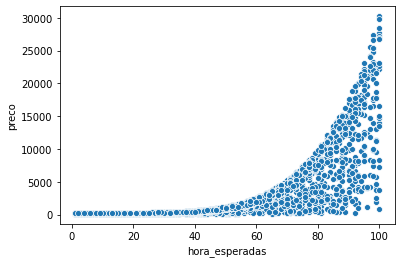

In [216]:
import seaborn as sns

sns.scatterplot(x='hora_esperadas',y='preco', data=dados)

#### Colocar um tom (hue) de uma cor de acordo com uma coluna

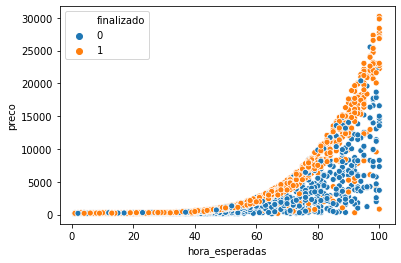

In [217]:
sns.scatterplot(x='hora_esperadas',y='preco',hue='finalizado', data=dados)

#### Dividir os dados de acordo com uma coluna

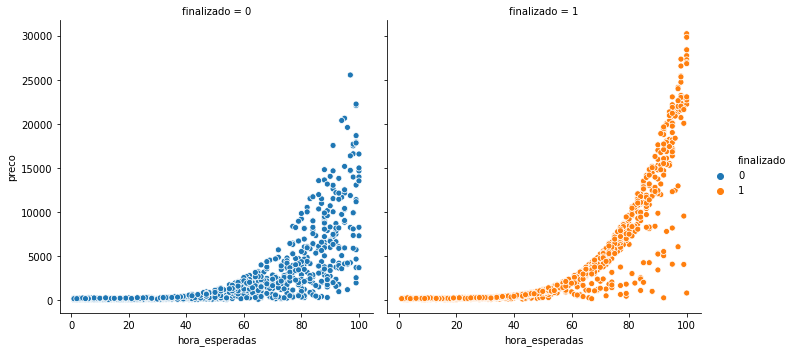

In [218]:
sns.relplot(x='hora_esperadas',y='preco',hue='finalizado',col='finalizado', data=dados)

In [219]:
x = dados[['hora_esperadas','preco']]
y = dados['finalizado']

### Regressão com SVC do sklearn

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Retirar aleotoriedade
np.random.seed(42)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,
                                                        test_size=0.25,
                                                        #Manter a proporção corretamente, de acordo com a saída
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acurácia foi de %.2f' % (acuracia*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 53.15


/usr/local/lib64/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### Previsões de linha de base(base line)

In [221]:
previsoes_dummy = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_dummy)
print('A acurácia dummy foi de %.2f' % (acuracia*100))


A acurácia dummy foi de 52.59


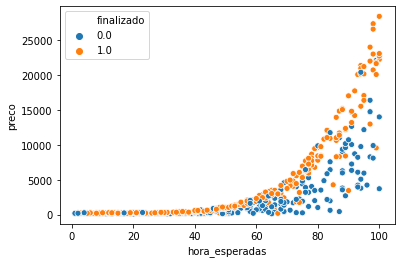

In [222]:
sns.scatterplot(x='hora_esperadas',y='preco',hue=teste_y, data=dados)

#### Gerando a borda de decisão (Descision Bourdary)

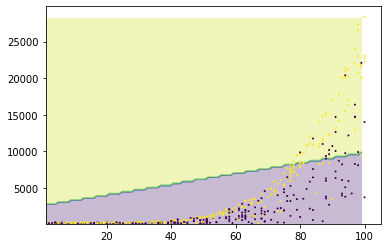

In [223]:
data_x = np.array(teste_x)[:,0]
data_y = np.array(teste_x)[:,1]
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Relacionamento não linear

#### Pre-processamento dos dados

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# Retirar aleatoriedade
np.random.seed(42)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,
                                                        test_size=0.25,
                                                        #Manter a proporção corretamente, de acordo com a saída
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print('A acurácia foi de %.2f' % (acuracia*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 60.74
